In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score
)
from sklearn.preprocessing import LabelEncoder

In [29]:
file_path = 'Income_Urban_VS_Rural.csv'  # Replace with your file path
data = pd.read_csv('Income_Urban_VS_Rural.csv')

In [30]:
data = data.dropna()  # Drop rows with missing values

In [31]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   County                   3222 non-null   object
 1   State                    3222 non-null   object
 2   FIPS                     3222 non-null   int64 
 3   State FIPS Code          3222 non-null   int64 
 4   County FIPS Code         3222 non-null   int64 
 5   Total Population         3222 non-null   int64 
 6   Median Household Income  3222 non-null   int64 
 7   Urban-Rural              3222 non-null   object
dtypes: int64(5), object(3)
memory usage: 201.5+ KB
None


In [34]:
label_encoder = LabelEncoder()

In [35]:
data['Urban-Rural'] = label_encoder.fit_transform(data['Urban-Rural'])

In [36]:
data['County'] = label_encoder.fit_transform(data['County'])
data['State'] = label_encoder.fit_transform(data['State'])

In [37]:
y = data['Urban-Rural']  # Target variable: Urban-Rural classification (0 = Rural, 1 = Urban)
X = data.drop(columns=['Urban-Rural', 'FIPS', 'State FIPS Code', 'County FIPS Code'])  # Features (drop irrelevant columns)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (Urban)

In [41]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
TPR = recall  # True Positive Rate is the same as recall
FPR = FP / (FP + TN)
TNR = TN / (TN + FP)  # True Negative Rate (Negative Predictive Rate)
FNR = FN / (FN + TP)  # False Negative Rate
sensitivity = recall  # Sensitivity is the same as Recall

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

In [44]:
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (TPR / Sensitivity): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"True Positive Rate (TPR / Sensitivity): {TPR:.2f}")
print(f"False Positive Rate (FPR): {FPR:.2f}")
print(f"True Negative Rate (TNR / NPR): {TNR:.2f}")
print(f"False Negative Rate (FNR): {FNR:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Confusion Matrix:
[[482   0]
 [  0 485]]
Accuracy: 1.00
Precision: 1.00
Recall (TPR / Sensitivity): 1.00
F1-Score: 1.00
True Positive Rate (TPR / Sensitivity): 1.00
False Positive Rate (FPR): 0.00
True Negative Rate (TNR / NPR): 1.00
False Negative Rate (FNR): 0.00
ROC-AUC: 1.00


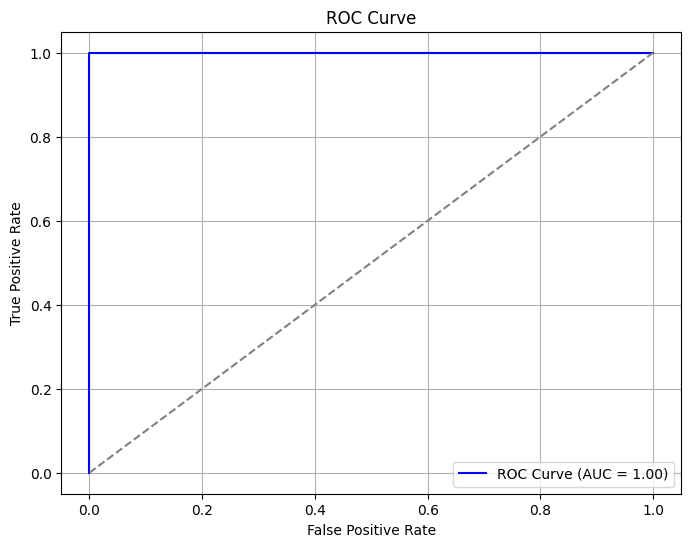

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()